### Demographics API

Below we have the code that retrieves the data from the  Mechanical Turk Tracker Demographics API.

In [1]:
!sudo -H pip install -U pip

Requirement already up-to-date: pip in /usr/local/lib/python2.7/dist-packages


In [2]:
!sudo -H pip install -U pandas

Requirement already up-to-date: pandas in /usr/local/lib/python2.7/dist-packages
Requirement already up-to-date: pytz>=2011k in /usr/local/lib/python2.7/dist-packages (from pandas)
Requirement already up-to-date: python-dateutil in /usr/local/lib/python2.7/dist-packages (from pandas)
Requirement already up-to-date: numpy>=1.7.0 in /usr/local/lib/python2.7/dist-packages (from pandas)
Requirement already up-to-date: six>=1.5 in /usr/local/lib/python2.7/dist-packages (from python-dateutil->pandas)


In [3]:
import pandas as pd
pd.__version__

u'0.20.1'

In [4]:
!sudo -H pip install -U numpy

Requirement already up-to-date: numpy in /usr/local/lib/python2.7/dist-packages


In [5]:
import numpy as np
np.__version__

'1.12.1'

In [6]:

df = pd.read_csv("mturk_surveys.csv")
df.drop(df.columns[0], axis=1, inplace=True) # drop the "index" column
# We now transform our API answer into a flat table
# and set the right data types
df["hit_answered_date"]=pd.to_datetime(df["hit_answered_date"])
df["hit_creation_date"]=pd.to_datetime(df["hit_creation_date"])
df["household_income"]=df["household_income"].astype("category")
df["household_size"]=df["household_size"].astype("category")
df["location_country"]=df["location_country"].astype("category")
df["marital_status"]=df["marital_status"].astype("category")
df['date'] = map(lambda x : x.date(), df['hit_answered_date'])
df['time'] = map(lambda x : x.time(), df['hit_answered_date'])
df.dtypes

gender                             object
hit_answered_date          datetime64[ns]
hit_creation_date          datetime64[ns]
household_income                 category
household_size                   category
location_city                      object
location_country                 category
location_region                    object
marital_status                   category
post_to_completion_secs           float64
worker_id                          object
year_of_birth                       int64
date                               object
time                               object
dtype: object

In [7]:
import datetime
import time

minDate = min(df['hit_answered_date'])
maxDate = max(df['hit_answered_date'])

# The following are for setting up the x-axis in the plots that
# show demographics over time
min_x = minDate.toordinal()
max_x = maxDate.toordinal()
ticks = 6
steps = (max_x-min_x)/ticks

days = (maxDate - minDate).days
print(minDate)
print(maxDate)
print(days)

2015-03-26 11:47:28.877000
2017-05-12 16:39:13.555000
778


In [8]:
print(min_x)
print(max_x)

735683
736461


In [9]:
df.head(5)

,gender,hit_answered_date,hit_creation_date,household_income,household_size,location_city,location_country,location_region,marital_status,post_to_completion_secs,worker_id,year_of_birth,date,time
0,male,2017-05-12 16:39:13.555,2017-05-12 16:38:12,"$40,000-$59,999",4,akron,US,oh,married,61.0,ad7991fa7fe1455bb01d7ee04009af2d,1982,2017-05-12,16:39:13.555000
1,male,2017-05-12 16:33:05.982,2017-05-12 16:08:10,"$25,000-$39,999",3,jackson,US,ms,single,1495.0,1c50d69dd371cd3301cd720406f1829d,1994,2017-05-12,16:33:05.982000
2,male,2017-05-12 16:30:28.059,2017-05-12 16:23:11,"$10,000-$14,999",2,chennai,IN,tn,single,437.0,10af5276c8c1909802ecaf6d0ee022e7,1989,2017-05-12,16:30:28.059000
3,female,2017-05-12 15:55:41.129,2017-05-12 15:53:13,"$40,000-$59,999",3,greenwich,US,ny,married,148.0,7ee96f1fa424876bb8aaea7a40863e7c,1984,2017-05-12,15:55:41.129000
4,female,2017-05-12 15:48:54.056,2017-05-12 15:38:12,"$100,000 or more",5+,waukee,US,ia,married,642.0,7a842e661be81447d934b3703a2773f9,1975,2017-05-12,15:48:54.056000


### Exploratory plots

In [10]:
!sudo -H pip3 install -U matplotlib

Requirement already up-to-date: matplotlib in /usr/local/lib/python3.5/dist-packages
Requirement already up-to-date: numpy>=1.7.1 in /usr/local/lib/python3.5/dist-packages (from matplotlib)
Requirement already up-to-date: six>=1.10 in /usr/lib/python3/dist-packages (from matplotlib)
Requirement already up-to-date: pytz in /usr/local/lib/python3.5/dist-packages (from matplotlib)
Requirement already up-to-date: pyparsing!=2.0.0,!=2.0.4,!=2.1.2,!=2.1.6,>=1.5.6 in /usr/local/lib/python3.5/dist-packages (from matplotlib)
Requirement already up-to-date: python-dateutil in /usr/local/lib/python3.5/dist-packages (from matplotlib)
Requirement already up-to-date: cycler>=0.10 in /usr/local/lib/python3.5/dist-packages (from matplotlib)


In [11]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.__version__

'2.0.0'

In [12]:
!sudo -H pip3 install -U seaborn

Requirement already up-to-date: seaborn in /usr/local/lib/python3.5/dist-packages


In [13]:
import seaborn as sns
sns.__version__

'0.7.1'

In [14]:
sns.set_style("whitegrid")
mpl.rc("figure", figsize=(16, 8))
mpl.rcParams.update({'font.size': 22})

#### Countries of the workers

In [15]:
# Let's see the top countries
country = df['location_country'].value_counts() / len(df)
country

US    0.752550
IN    0.164242
CA    0.010935
GB    0.007281
PH    0.003641
DE    0.002776
FR    0.002711
VE    0.002671
IT    0.002357
ZZ    0.002082
BR    0.001951
MX    0.001663
ES    0.001585
AE    0.001558
AU    0.001493
RO    0.001270
GR    0.001231
RU    0.001218
TR    0.001205
SG    0.001126
MK    0.001113
JP    0.000956
NZ    0.000956
ID    0.000956
KE    0.000956
PT    0.000943
NG    0.000930
SA    0.000917
TH    0.000917
NL    0.000825
        ...   
KZ    0.000039
LI    0.000026
AZ    0.000026
BS    0.000026
PY    0.000026
PF    0.000013
PS    0.000013
ET    0.000013
SR    0.000013
MV    0.000013
AM    0.000013
TJ    0.000013
AI    0.000013
AG    0.000013
AF    0.000013
NI    0.000013
LA    0.000013
MN    0.000013
BM    0.000013
LB    0.000013
FJ    0.000013
BU    0.000013
CD    0.000013
KG    0.000013
JE    0.000013
CN    0.000013
TZ    0.000013
HT    0.000013
DJ    0.000013
IM    0.000013
Name: location_country, Length: 142, dtype: float64

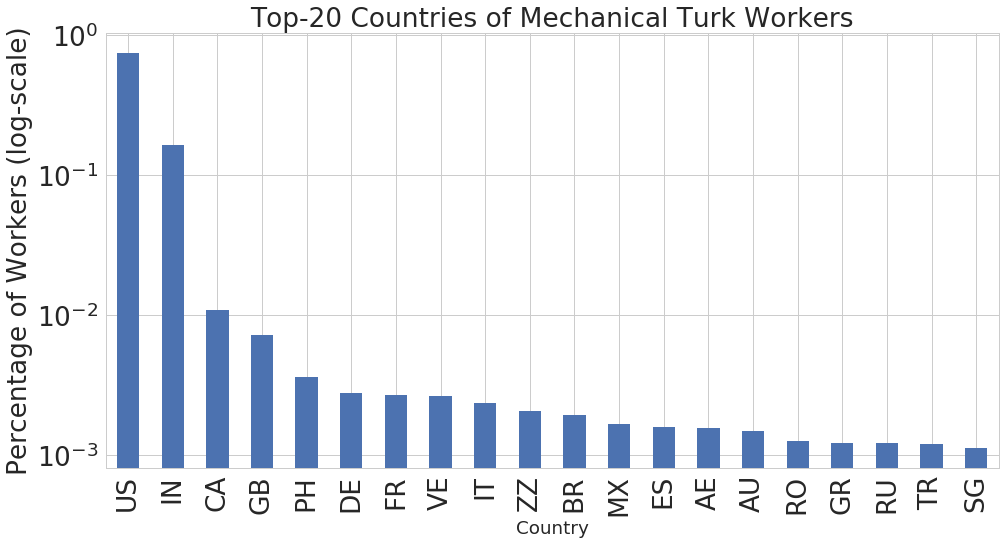

In [16]:
ax = country.head(20).plot.bar(logy=True, fontsize='large')
ax.set_title("Top-20 Countries of Mechanical Turk Workers", fontsize='large')
ax.set_xlabel("Country", fontsize='small')
ax.set_ylabel("Percentage of Workers (log-scale)", fontsize='large')
fig = ax.get_figure()
fig.savefig('plots/countries.pdf', bbox_inches='tight')

In [17]:
country_table = pd.crosstab(index=df.date, columns=df.location_country, 
                            values='worker_id', aggfunc=np.count_nonzero, normalize='index')


In [18]:
m = country_table['US'].ewm(span=30).mean()
s = country_table['US'].ewm(span=30).std()

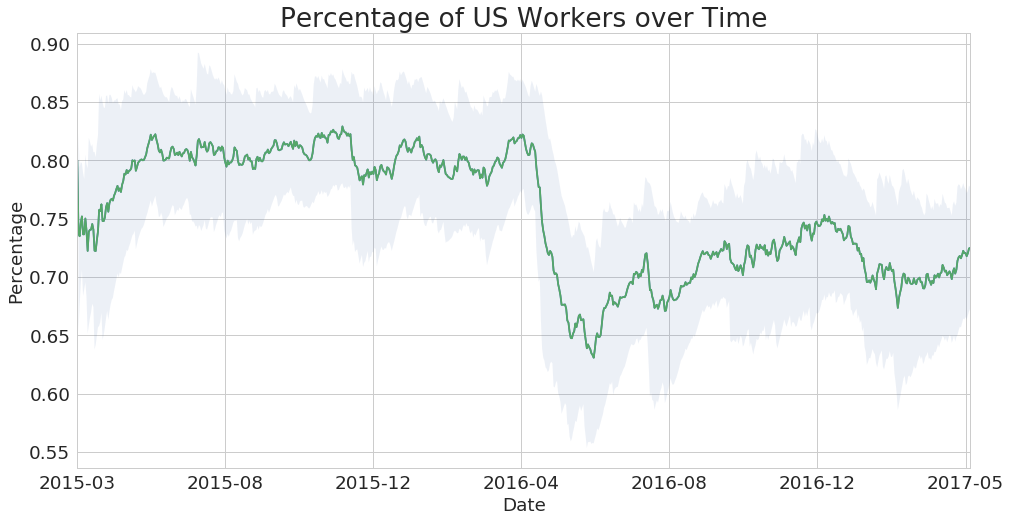

In [19]:

plt.figure()
ax = plt.gca()

plt.plot(m.index, m)
plt.fill_between(m.index, m-s, m+s, alpha=0.1)


ax = country_table['US'].ewm(span=30).mean().plot(fontsize='small')
ax.set_title("Percentage of US Workers over Time", fontsize='large')
ax.set_ylabel("Percentage", fontsize='small')
ax.set_xlabel("Date", fontsize='small')

ax.xaxis.set_ticks(np.arange(min_x, max_x, steps))
ax.yaxis.set_ticks(np.arange(0.55, 0.91, 0.05))
fig = ax.get_figure()
fig.savefig('plots/country-us-overtime.pdf', bbox_inches='tight')

In [20]:
country_table_time = pd.crosstab(index=df.time, columns=df.location_country, 
                            values='worker_id', aggfunc=np.count_nonzero, normalize='index')
country_table_time.sort_index(inplace=True)

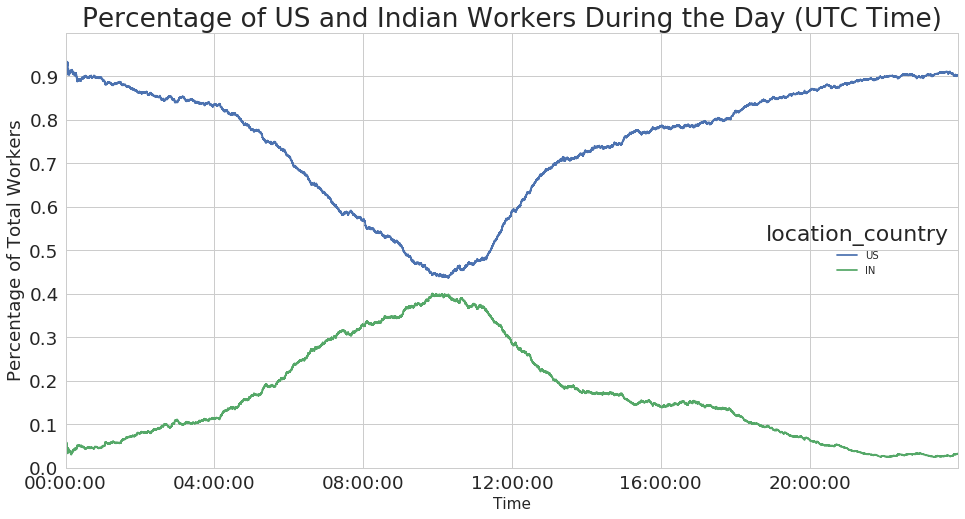

In [21]:
ax = country_table_time[['US','IN']].ewm(span=3600).mean().plot( fontsize='small', xlim=[0,86400], ylim=[0,1])
ax.set_title("Percentage of US and Indian Workers During the Day (UTC Time)", fontsize='large')
ax.set_ylabel("Percentage of Total Workers", fontsize='small')
ax.set_xlabel("Time", fontsize='x-small')
ax.xaxis.set_ticks(np.arange(0, 84400, 14400))
ax.yaxis.set_ticks(np.arange(0, 1, 0.1))
fig = ax.get_figure()
fig.savefig('plots/country-us-in-time-of-day.pdf')

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: 'pandas.tools.plotting.autocorrelation_plot' is deprecated, import 'pandas.plotting.autocorrelation_plot' instead.
  after removing the cwd from sys.path.


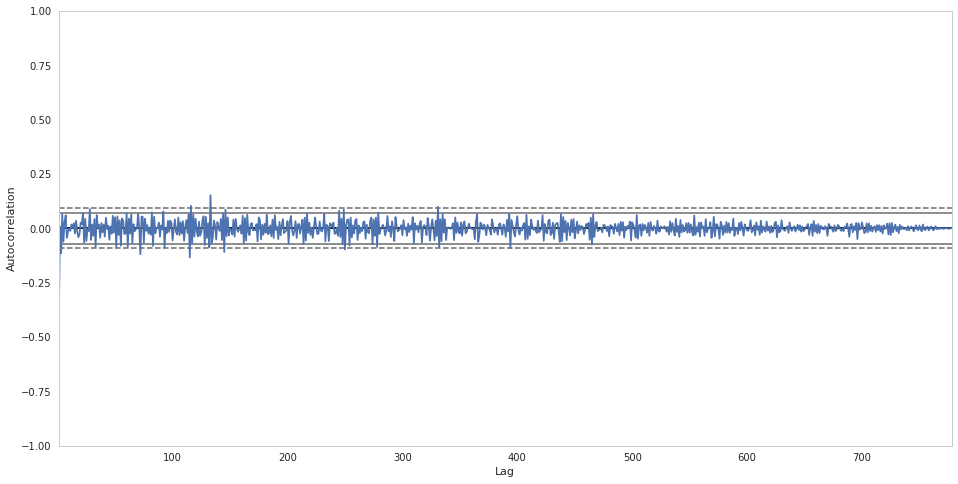

In [22]:
# No significant periodicity
from pandas.tools.plotting import autocorrelation_plot
data = country_table['US'].ewm(span=1).mean().diff()[1:]
autocorrelation_plot(data)

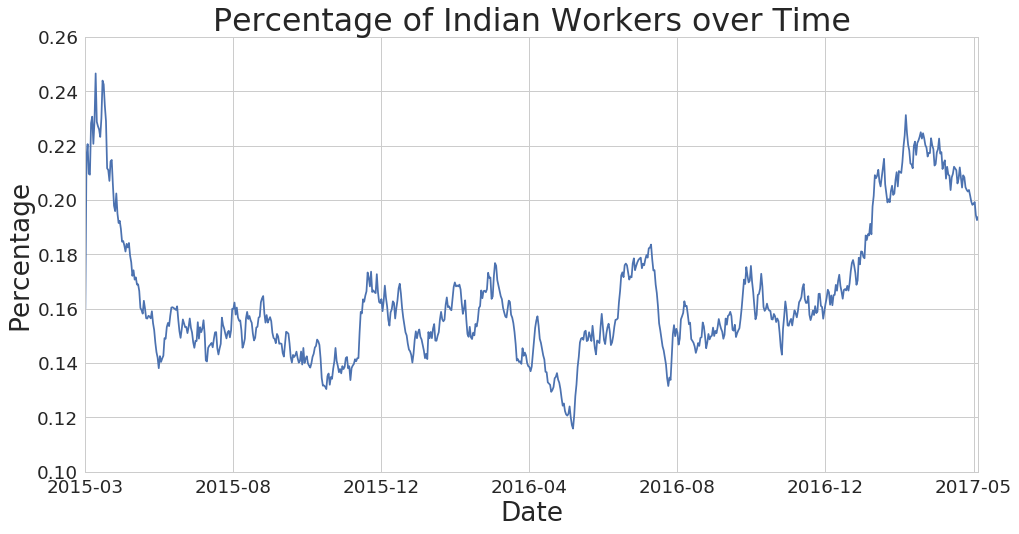

In [23]:
ax = country_table['IN'].ewm(span=30).mean().plot(fontsize='small')
ax.set_title("Percentage of Indian Workers over Time", fontsize='x-large')
ax.set_ylabel("Percentage", fontsize='large')
ax.set_xlabel("Date", fontsize='large')
ax.xaxis.set_ticks(np.arange(min_x, max_x, steps))
ax.yaxis.set_ticks(np.arange(0.10, 0.28, 0.02))
fig = ax.get_figure()
fig.savefig('plots/country-india-overtime.pdf')

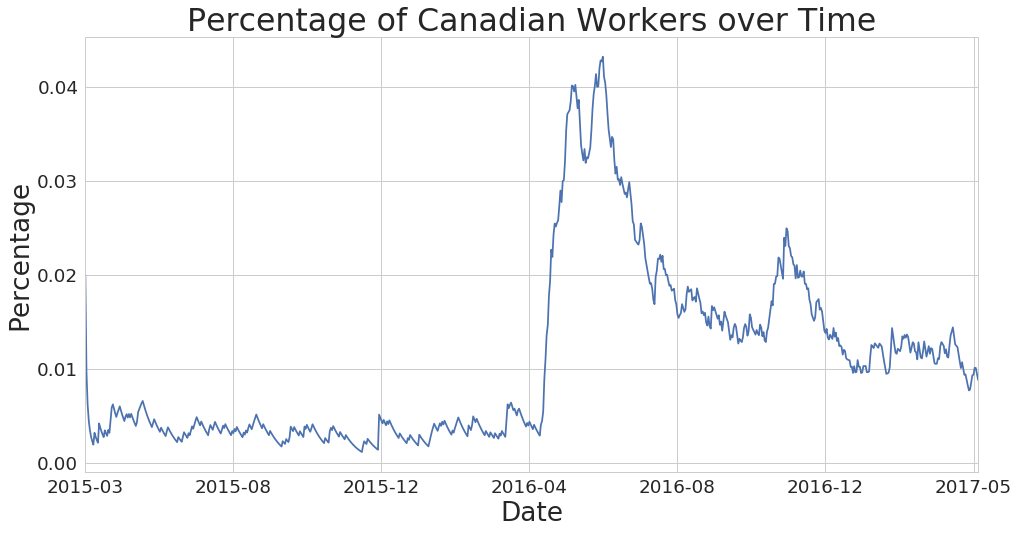

In [24]:
ax = country_table['CA'].ewm(span=30).mean().plot(fontsize='small')
ax.set_title("Percentage of Canadian Workers over Time", fontsize='x-large')
ax.set_ylabel("Percentage", fontsize='large')
ax.set_xlabel("Date", fontsize='large')
ax.xaxis.set_ticks(np.arange(min_x, max_x, steps))
fig = ax.get_figure()
fig.savefig('plots/country-canada-overtime.pdf')

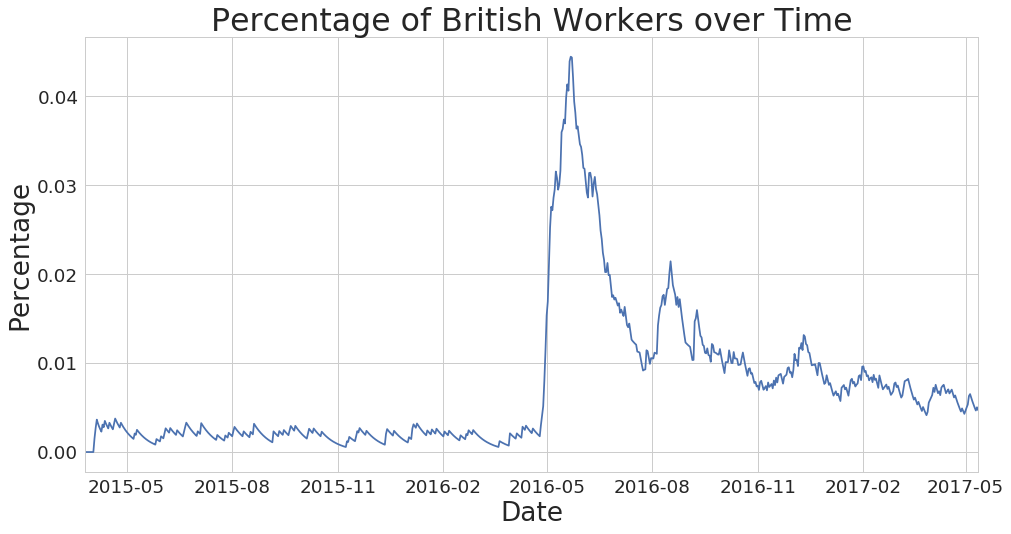

In [25]:
ax = country_table['GB'].ewm(span=30).mean().plot(fontsize='small')
ax.set_title("Percentage of British Workers over Time", fontsize='x-large')
ax.set_ylabel("Percentage", fontsize='large')
ax.set_xlabel("Date", fontsize='large')
fig = ax.get_figure()
fig.savefig('plots/country-uk-overtime.pdf')

### Gender

In [26]:
gender_table = pd.crosstab(index=df.date, columns=df.gender, 
                            values='worker_id', aggfunc=np.count_nonzero, normalize='index')

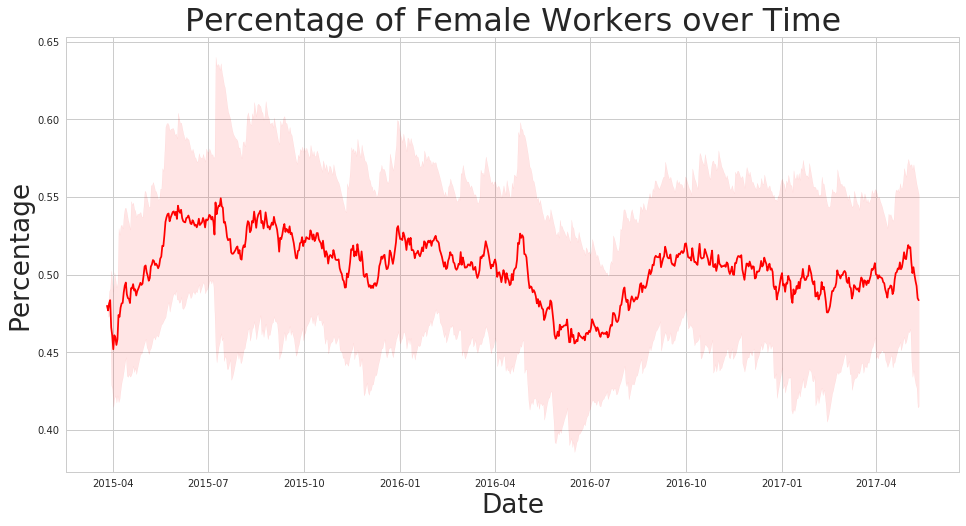

In [27]:
fm = gender_table['female'].ewm(span=30).mean() # female mean
fs = gender_table['female'].ewm(span=30).std()  # female std
plt.figure()
ax = plt.gca()
plt.plot(fm.index, fm, 'r')
plt.fill_between(fs.index, fm-fs, fm+fs, color='r', alpha=0.1)
ax.set_title("Percentage of Female Workers over Time", fontsize='x-large')
ax.set_ylabel("Percentage", fontsize='large')
ax.set_xlabel("Date", fontsize='large')


#plt.plot(male_mean.index, male_mean, 'b')

#.plot(fontsize='x-large')
#ax.set_title("Percentage of US Workers over Time", fontsize='x-large')
#ax.set_ylabel("Percentage", fontsize='x-large')
#ax.set_xlabel("Date", fontsize='x-large')

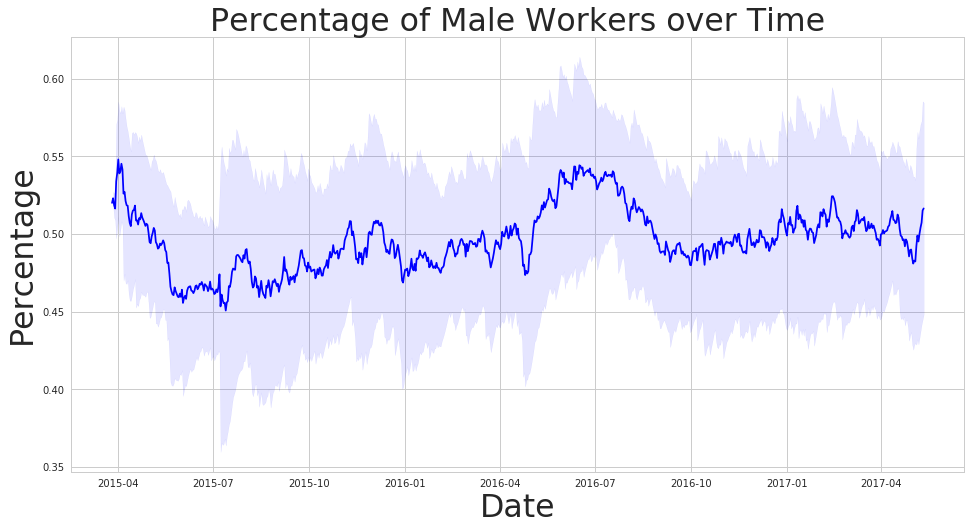

In [28]:
fm = gender_table['male'].ewm(span=30).mean() # male mean
fs = gender_table['male'].ewm(span=30).std()  # male std
plt.figure()
ax = plt.gca()
plt.plot(fm.index, fm, 'b')
plt.fill_between(fs.index, fm-fs, fm+fs, color='b', alpha=0.1)
ax.set_title("Percentage of Male Workers over Time", fontsize='x-large')
ax.set_ylabel("Percentage", fontsize='x-large')
ax.set_xlabel("Date", fontsize='x-large')


### Gender by Country

In [29]:
gender_table_us = pd.crosstab(index=df[df.location_country=='US'].date, columns=df[df.location_country=='US'].gender, 
                            values='worker_id', aggfunc=np.count_nonzero, normalize='index')

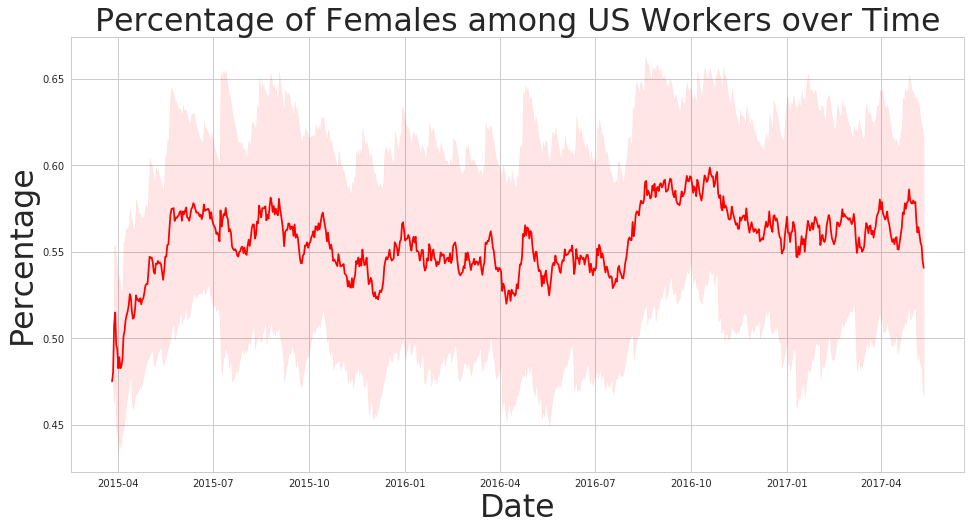

In [30]:
fm = gender_table_us['female'].ewm(span=30).mean() # female mean
fs = gender_table_us['female'].ewm(span=30).std()  # female std
plt.figure()
ax = plt.gca()
plt.plot(fm.index, fm, 'r')
plt.fill_between(fs.index, fm-fs, fm+fs, color='r', alpha=0.1)
ax.set_title("Percentage of Females among US Workers over Time", fontsize='x-large')
ax.set_ylabel("Percentage", fontsize='x-large')
ax.set_xlabel("Date", fontsize='x-large')


In [31]:
gender_table_in = pd.crosstab(index=df[df.location_country=='IN'].date, columns=df[df.location_country=='IN'].gender, 
                            values='worker_id', aggfunc=np.count_nonzero, normalize='index')

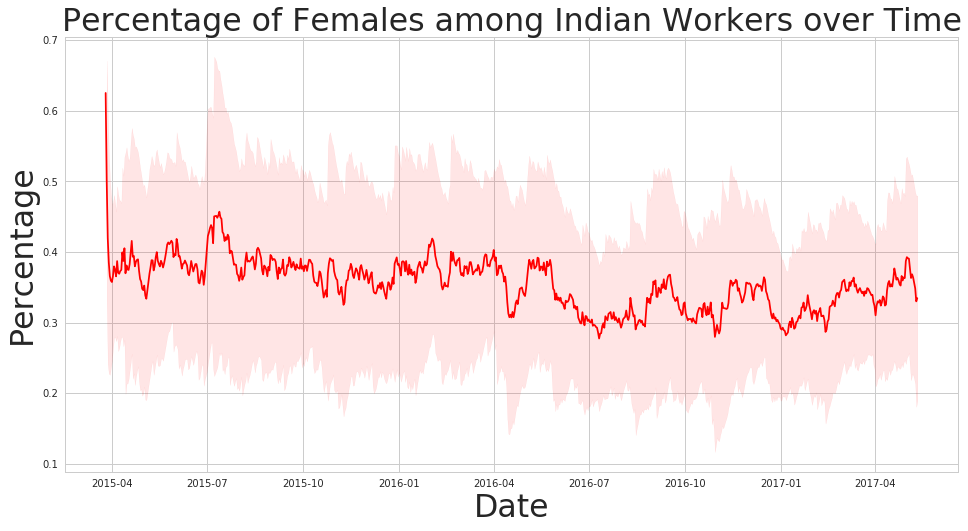

In [32]:
fm = gender_table_in['female'].ewm(span=30).mean() # female mean
fs = gender_table_in['female'].ewm(span=30).std()  # female std
plt.figure()
ax = plt.gca()
plt.plot(fm.index, fm, 'r')
plt.fill_between(fs.index, fm-fs, fm+fs, color='r', alpha=0.1)
ax.set_title("Percentage of Females among Indian Workers over Time", fontsize='x-large')
ax.set_ylabel("Percentage", fontsize='x-large')
ax.set_xlabel("Date", fontsize='x-large')


### Year of Birth

In [33]:
df['yob_decade'] = df['year_of_birth'].apply(lambda x: str(int(round(x,-1)))+'-'+str(int(round(x,-1))+9))

In [34]:
yob_table = pd.crosstab(index=df.date, columns=df.yob_decade, 
                            values='worker_id', aggfunc=np.count_nonzero, normalize='index')

In [35]:
yob_table.head(5)

yob_decade,1910-1919,1920-1929,1930-1939,1940-1949,1950-1959,1960-1969,1970-1979,1980-1989,1990-1999,2000-2009,2010-2019
date,,,,,,,,,,,
2015-03-26,0.0,0.0,0.0,0.0,0.000000,0.120000,0.100000,0.320000,0.400000,0.060000,0.0
2015-03-27,0.0,0.0,0.0,0.0,0.051546,0.072165,0.134021,0.288660,0.443299,0.010309,0.0
2015-03-28,0.0,0.0,0.0,0.0,0.010417,0.041667,0.145833,0.364583,0.416667,0.020833,0.0
2015-03-29,0.0,0.0,0.0,0.0,0.031915,0.042553,0.074468,0.351064,0.478723,0.021277,0.0
2015-03-30,0.0,0.0,0.0,0.0,0.020833,0.145833,0.104167,0.312500,0.385417,0.031250,0.0


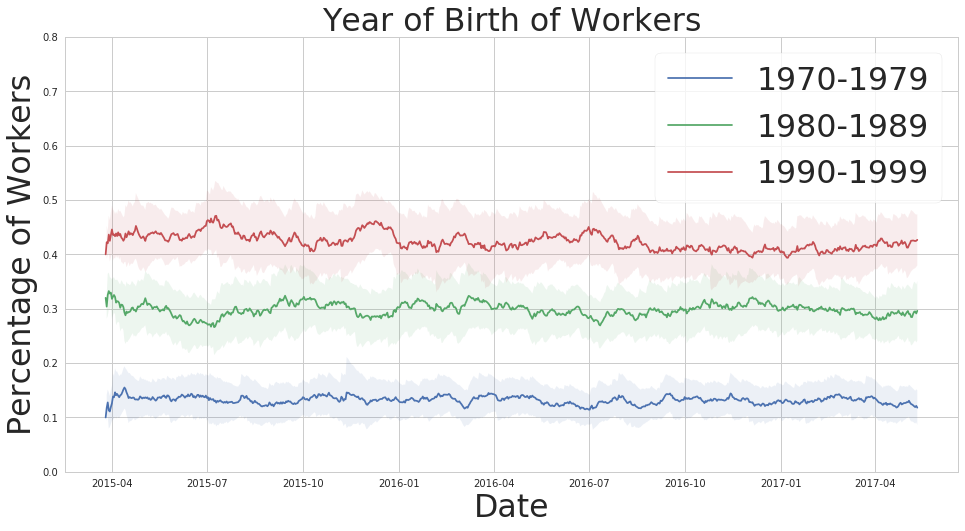

In [36]:
decades = ['1970-1979', '1980-1989','1990-1999']
fm = yob_table[decades].ewm(span=30).mean()
fs = yob_table[decades].ewm(span=30).std() 
plt.figure()

for d in decades:
    plt.plot(fm.index, fm[d])
    plt.ylim([0,0.8])
    plt.fill_between(fs.index, fm[d]-fs[d], fm[d]+fs[d], alpha=0.1)


ax = plt.gca()
ax.set_title("Year of Birth of Workers", fontsize='x-large')
ax.set_ylabel("Percentage of Workers", fontsize='x-large')
ax.set_xlabel("Date", fontsize='x-large')
ax.legend(decades, fontsize='x-large', fancybox=True, frameon = True)

#### Indian workers are *slightly* younger

In [37]:
yob_table_in = pd.crosstab(index=df[df.location_country=='IN'].date, columns=df[df.location_country=='IN'].yob_decade, 
                            values='worker_id', aggfunc=np.count_nonzero, normalize='index')

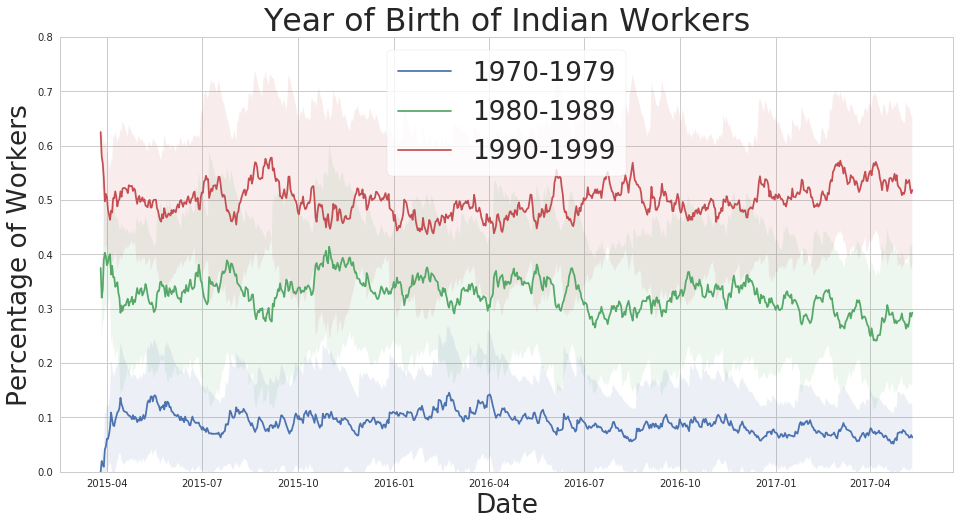

In [38]:
decades = ['1970-1979', '1980-1989','1990-1999']
fm = yob_table_in[decades].ewm(span=30).mean()
fs = yob_table_in[decades].ewm(span=30).std() 
plt.figure()

for d in decades:
    plt.plot(fm.index, fm[d])
    plt.ylim([0,0.8])
    plt.fill_between(fs.index, fm[d]-fs[d], fm[d]+fs[d], alpha=0.1)


ax = plt.gca()
ax.set_title("Year of Birth of Indian Workers", fontsize='x-large')
ax.set_ylabel("Percentage of Workers", fontsize='large')
ax.set_xlabel("Date", fontsize='large')
ax.legend(decades, fontsize='large', fancybox=True, frameon = True)

### Marital Status

In [39]:
married_table = pd.crosstab(index=df.date, columns=df.marital_status, 
                            values='worker_id', aggfunc=np.count_nonzero, normalize='index')

In [40]:
status = set(df.marital_status)
status.discard('None')
status.discard('separated')
status.discard('widowed')
status = sorted(status)
status

['cohabitating', 'divorced', 'engaged', 'married', 'single']

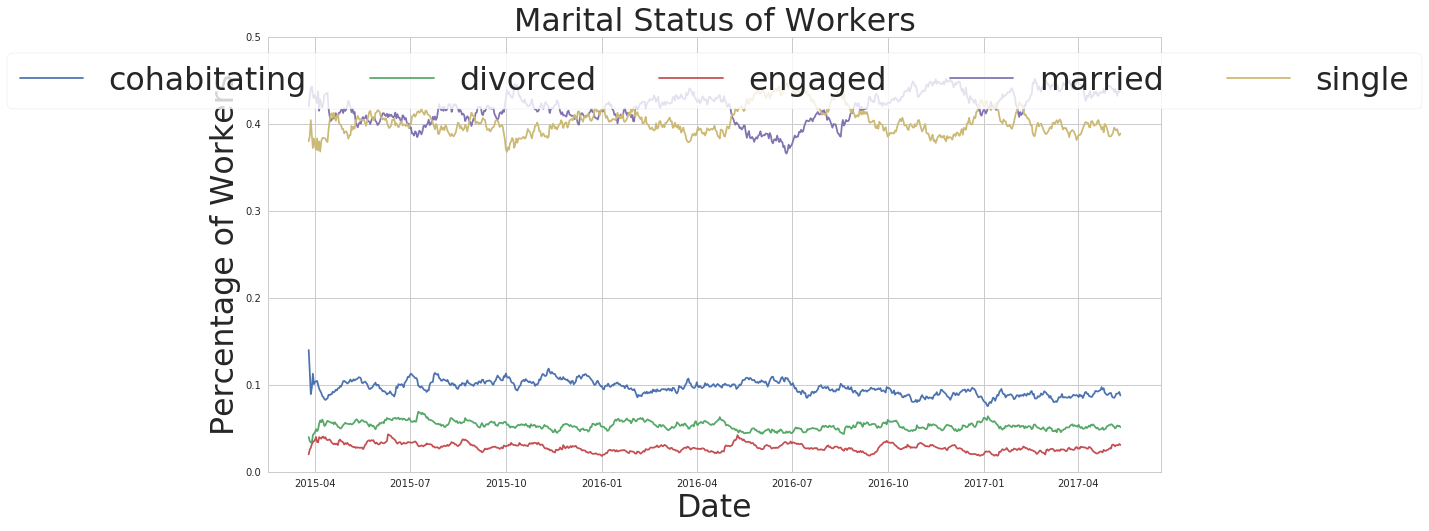

In [41]:
fm = married_table[status].ewm(span=30).mean()
fs = married_table[status].ewm(span=30).std() 
plt.figure()

for d in status:
    plt.plot(fm.index, fm[d])
    plt.ylim([0,0.5])
    # plt.fill_between(fs.index, fm[d]-fs[d], fm[d]+fs[d], alpha=0.1)


ax = plt.gca()
ax.set_title("Marital Status of Workers", fontsize='x-large')
ax.set_ylabel("Percentage of Workers", fontsize='x-large')
ax.set_xlabel("Date", fontsize='x-large')
ax.legend(status, fontsize='x-large', fancybox=True, frameon = True, loc="upper center", ncol=5)

In [42]:
married_table_in = pd.crosstab(index=df[df.location_country=='IN'].date, columns=df[df.location_country=='IN'].marital_status, 
                            values='worker_id', aggfunc=np.count_nonzero, normalize='index')

In [43]:
status = set(df.marital_status)
status.discard('None')
status.discard('separated')
status.discard('widowed')
status.discard('engaged')
status.discard('divorced')
status.discard('cohabitating')
status = sorted(status)
status

['married', 'single']

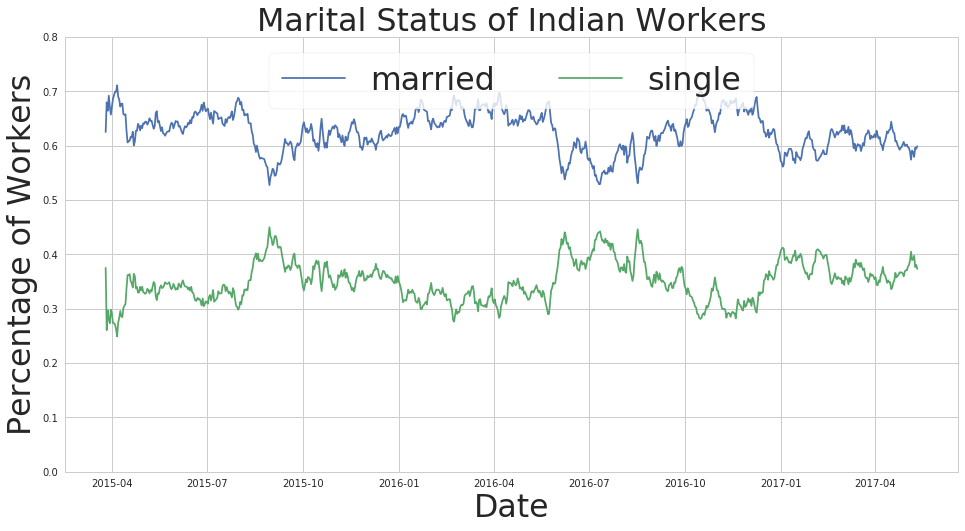

In [44]:
fm = married_table_in[status].ewm(span=30).mean()
fs = married_table_in[status].ewm(span=30).std() 
plt.figure()

for d in status:
    plt.plot(fm.index, fm[d])
    plt.ylim([0,0.8])
    # plt.fill_between(fs.index, fm[d]-fs[d], fm[d]+fs[d], alpha=0.1)


ax = plt.gca()
ax.set_title("Marital Status of Indian Workers", fontsize='x-large')
ax.set_ylabel("Percentage of Workers", fontsize='x-large')
ax.set_xlabel("Date", fontsize='x-large')
ax.legend(status, fontsize='x-large', fancybox=True, frameon = True, loc="upper center", ncol=5)

### Household Size



In [45]:
hhsize_table = pd.crosstab(index=df.date, columns=df.household_size, 
                           values='worker_id', aggfunc=np.count_nonzero, normalize='index')

In [46]:
status = sorted(set(df.household_size))

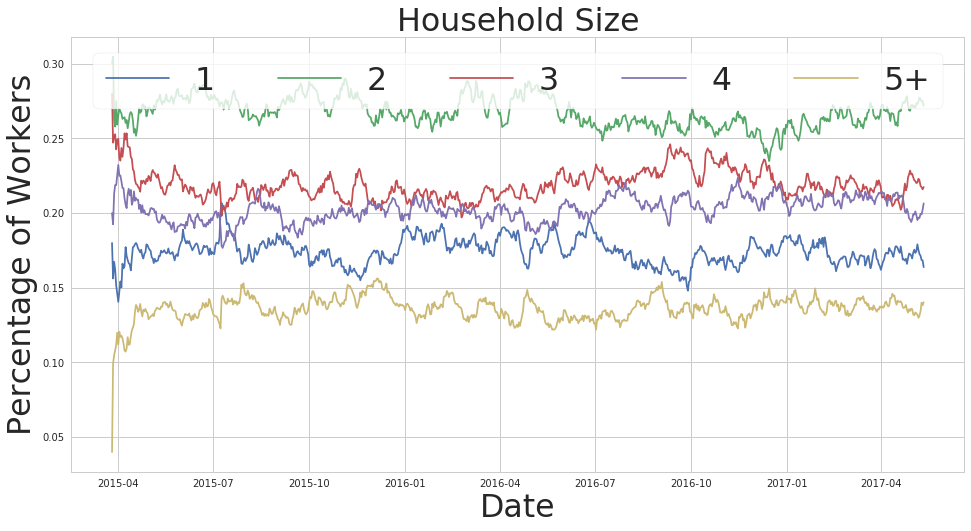

In [47]:
fm = hhsize_table[status].ewm(span=30).mean()
fs = hhsize_table[status].ewm(span=30).std() 

plt.figure()

#from itertools import cycle
#lines = ["r-","r--","r-.","b:", "b-"]
#linecycler = cycle(lines)

for d in status:
    plt.plot(fm.index, fm[d]) #, next(linecycler))
    # plt.ylim([0,0.2])
    # plt.fill_between(fs.index, fm[d]-fs[d], fm[d]+fs[d], alpha=0.1)


ax = plt.gca()
ax.set_title("Household Size", fontsize='x-large')
ax.set_ylabel("Percentage of Workers", fontsize='x-large')
ax.set_xlabel("Date", fontsize='x-large')
ax.legend(status, fontsize='x-large', fancybox=True, frameon = True, loc="upper center", ncol=5)

#### HHSize for Single and Married People

In [48]:
hhsize_table = pd.crosstab(index=df.date, columns=[df.household_size, df.marital_status], 
                           values='worker_id', aggfunc=np.count_nonzero, normalize='index')

In [49]:
import itertools

marital = set(df.marital_status)
marital.discard('None')
marital.discard('separated')
marital.discard('widowed')
marital.discard('engaged')
marital.discard('divorced')
marital.discard('cohabitating')
# marital.discard('single')
marital.discard('married')


hhsize = set(df.household_size)
# hhsize.discard('1')
# hhsize.discard('2')
# hhsize.discard('3')
# hhsize.discard('4')
# hhsize.discard('5+')

status = sorted(itertools.product(hhsize, marital))
status

[('1', 'single'),
 ('2', 'single'),
 ('3', 'single'),
 ('4', 'single'),
 ('5+', 'single')]

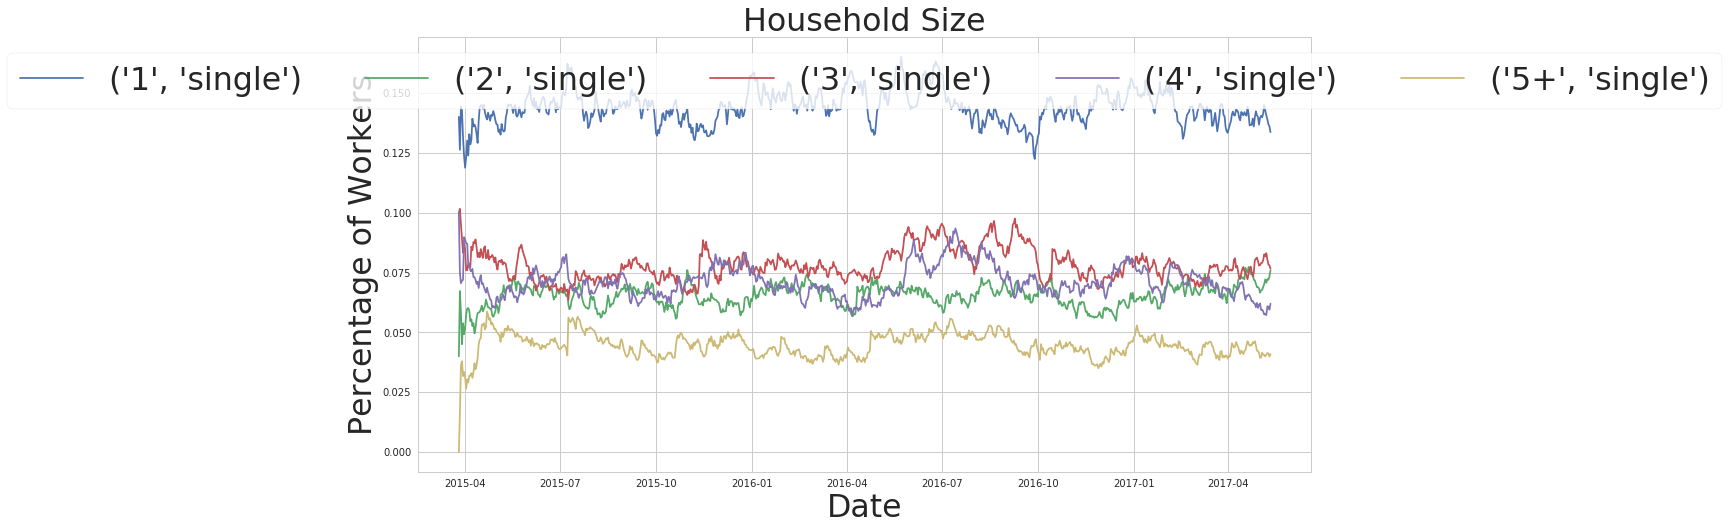

In [50]:
fm = hhsize_table[status].ewm(span=30).mean()
fs = hhsize_table[status].ewm(span=30).std() 
plt.figure()

for d in status:
    plt.plot(fm.index, fm[d])
    # plt.ylim([0,0.2])
    # plt.fill_between(fs.index, fm[d]-fs[d], fm[d]+fs[d], alpha=0.1)


ax = plt.gca()
ax.set_title("Household Size", fontsize='x-large')
ax.set_ylabel("Percentage of Workers", fontsize='x-large')
ax.set_xlabel("Date", fontsize='x-large')
ax.legend(status, fontsize='x-large', fancybox=True, frameon = True, loc="upper center", ncol=5)

In [51]:
import itertools

marital = set(df.marital_status)
marital.discard('None')
marital.discard('separated')
marital.discard('widowed')
marital.discard('engaged')
marital.discard('divorced')
marital.discard('cohabitating')
marital.discard('single')
# marital.discard('married')


hhsize = set(df.household_size)
# hhsize.discard('1')
# hhsize.discard('2')
# hhsize.discard('3')
# hhsize.discard('4')
# hhsize.discard('5+')

status = sorted(itertools.product(hhsize, marital))
status

[('1', 'married'),
 ('2', 'married'),
 ('3', 'married'),
 ('4', 'married'),
 ('5+', 'married')]

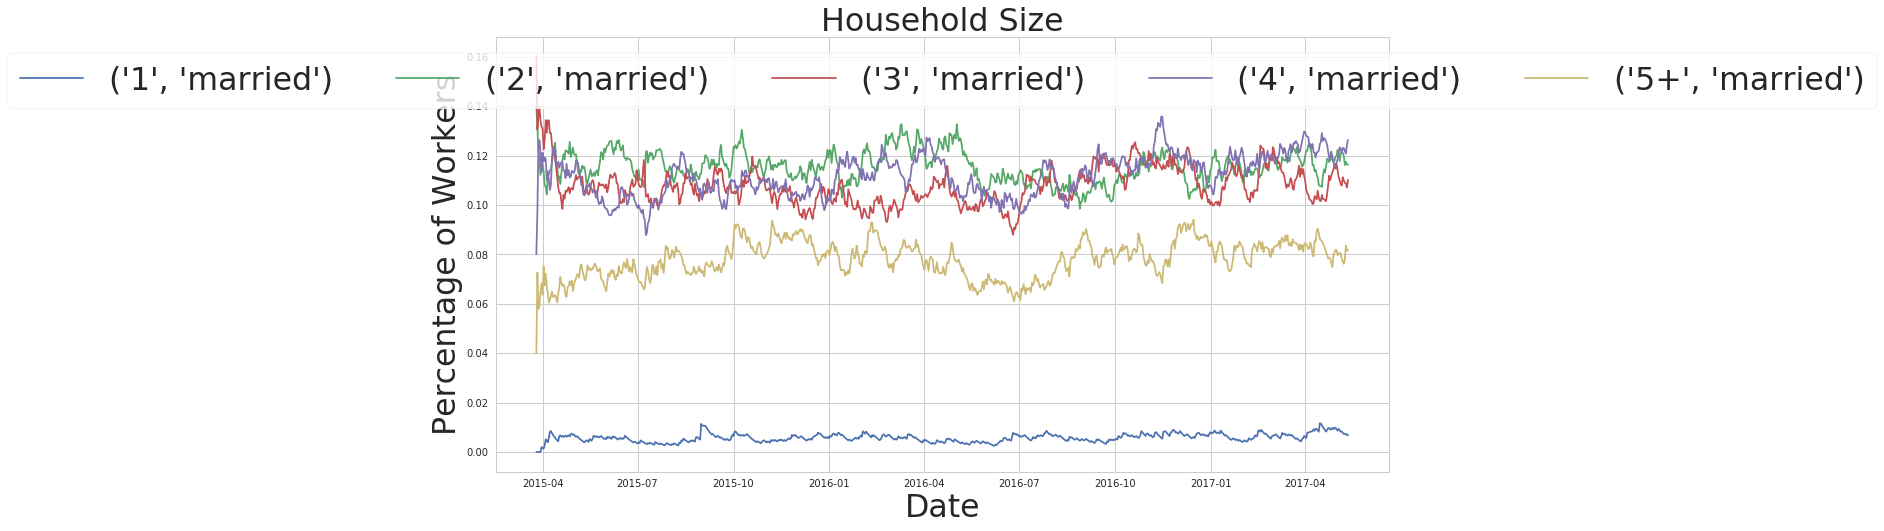

In [52]:
fm = hhsize_table[status].ewm(span=30).mean()
fs = hhsize_table[status].ewm(span=30).std() 
plt.figure()

for d in status:
    plt.plot(fm.index, fm[d])
    # plt.ylim([0,0.2])
    # plt.fill_between(fs.index, fm[d]-fs[d], fm[d]+fs[d], alpha=0.1)


ax = plt.gca()
ax.set_title("Household Size", fontsize='x-large')
ax.set_ylabel("Percentage of Workers", fontsize='x-large')
ax.set_xlabel("Date", fontsize='x-large')
ax.legend(status, fontsize='x-large', fancybox=True, frameon = True, loc="upper center", ncol=5)

### Household Income

In [53]:
hhincome_table = pd.crosstab(index=df.date, columns=df.household_income, 
                           values='worker_id', aggfunc=np.count_nonzero, normalize='index')

status = sorted(set(df.household_income))

# Reconfiguring the order
status[0],  status[1], status[7] = status[7], status[0], status[1]
status

['Less than $10,000',
 '$10,000-$14,999',
 '$15,000-$24,999',
 '$25,000-$39,999',
 '$40,000-$59,999',
 '$60,000-$74,999',
 '$75,000-$99,999',
 '$100,000 or more']

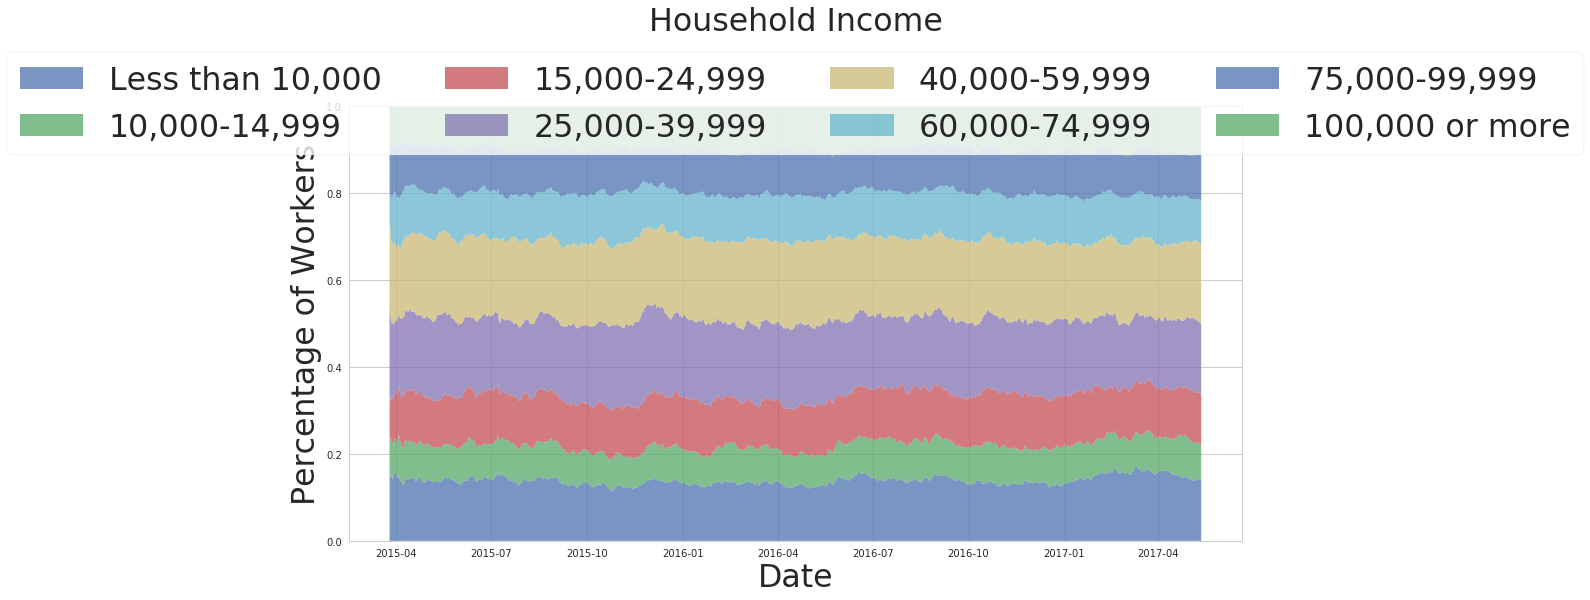

In [54]:
import string

fm = hhincome_table[sorted(status)].ewm(span=30).mean()
fs = hhincome_table[sorted(status)].ewm(span=30).std() 
plt.figure()

incomes = [fm[d] for d in status]

plt.stackplot(fm.index, incomes, alpha=0.75)
plt.ylim([0.0,1.0])

ax = plt.gca()
ax.set_title("Household Income", fontsize='x-large', y=1.16)
ax.set_ylabel("Percentage of Workers", fontsize='x-large')
ax.set_xlabel("Date", fontsize='x-large')


legend = []
for stat in status:
    s = string.replace(stat, '$','')
    legend.append(s)
    
ax.legend(legend, fontsize='x-large', fancybox=True, frameon = True, loc="upper center", ncol=4, 
         bbox_to_anchor=(0.5, 1.16))